# This notebook is for the IBM Data Science Certificate Capstone Project called The Battle of the Neighborhoods

### Please see the accompanying report and presentation which incorporate the data findings derived here

In [1]:
import pandas as pd
import numpy as np

In [2]:
path='SalesData.csv'
df = pd.read_csv(path)
df.head()

,Address,Price,Beds,Bath,SqFt,Sold,Bmt Unf,Bsmt Fin,Year,ES,MS,HS,Garage,Subdivision,View,District Rating
0,421 Winding Creek Pl,378000,4,3.0,3052,5/30/2019,936,0,1974.0,East Side,Dickerson,Walton,attached,Indian Hills,NaN,0.94
1,403 Indian Hills Trail,443900,4,3.0,2800,8/31/2019,524,0,1974.0,East Side,Dickerson,Walton,NaN,Indian Hills,NaN,0.94
2,130 Indian Hills Court,385000,3,2.0,2566,8/16/2019,0,0,NaN,East Valley,East Cobb,Wheeler,attached,Indian Hills,NaN,0.67
3,3494 Clubland Drive,400000,3,3.0,1866,9/10/2019,0,0,1972.0,East Side,Dickerson,Walton,NaN,Indian Hills,NaN,0.94
4,3483 Clubland Drive,492500,4,5.0,2310,6/20/2019,0,0,1972.0,East Side,Dickerson,Walton,attached,Indian Hills,Golf,0.94


In [7]:
%%capture
! pip install seaborn

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

(0, 512317.9709345106)

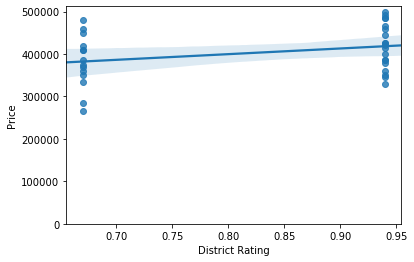

In [9]:
# District Rating as potential predictor variable of price
sns.regplot(x="District Rating", y="Price", data=df)
plt.ylim(0,)

In [11]:
Z = df[['Beds', 'Bath', 'SqFt', 'Bmt Unf', 'Bsmt Fin', 'District Rating']]

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
lm.fit(Z, df['Price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
lm.intercept_

83545.79359976726

In [16]:
lm.coef_

array([-5.20464785e+03,  1.92504827e+04,  5.94197889e+01, -3.94557907e+01,
        3.52624076e+01,  1.44994086e+05])

## so we have our price prediction equation as:
## Price = 83545 + Beds x -140.98 +  Bath x 13.73 + 5.94 x SqFt + -3.94 x Bsm Unf + 3.52 x Bsmt Fin + 1.44 x District Rating

In [17]:
import seaborn as sns
%matplotlib inline 

(0, 579006.7257086193)

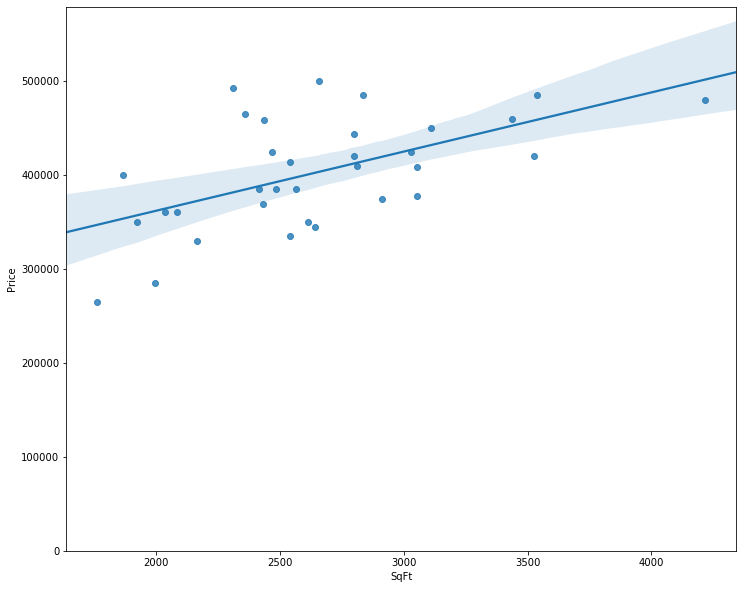

In [19]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="SqFt", y="Price", data=df)
plt.ylim(0,)

In [22]:
df[['Beds', 'Bath', 'SqFt', 'Bmt Unf', 'Bsmt Fin', 'District Rating',"Price"]].corr()

,Beds,Bath,SqFt,Bmt Unf,Bsmt Fin,District Rating,Price
Beds,1.000000,0.471253,0.429308,-0.012818,0.154308,0.151462,0.359360
Bath,0.471253,1.000000,0.120469,-0.061944,0.077231,0.166639,0.318249
SqFt,0.429308,0.120469,1.000000,0.144286,0.253866,-0.022870,0.572481
Bmt Unf,-0.012818,-0.061944,0.144286,1.000000,-0.086308,0.209340,-0.006134
Bsmt Fin,0.154308,0.077231,0.253866,-0.086308,1.000000,-0.057610,0.356935
District Rating,0.151462,0.166639,-0.022870,0.209340,-0.057610,1.000000,0.306800
Price,0.359360,0.318249,0.572481,-0.006134,0.356935,0.306800,1.000000


In [26]:
Y_hat = lm.predict(Z)

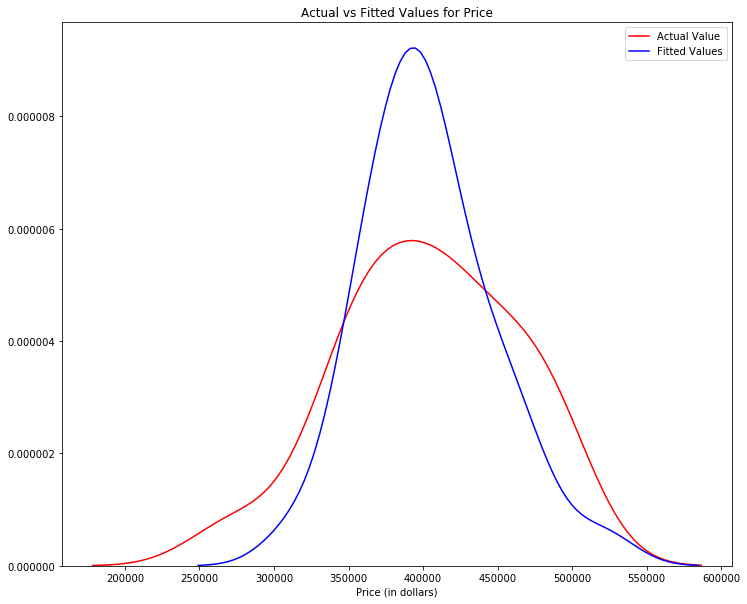

In [29]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')


plt.show()
plt.close()

In [30]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Homes')

    plt.show()
    plt.close()

In [32]:
# fit the model 
#lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['Price']))

The R-square is:  0.5351629188320994


### We can say that ~ 54 % of the variation of price is explained by this multiple linear regression "multi_fit"